In [8]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D #To visualise in 3D
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

df = pd.read_csv("data_3dprinter.csv")#importing dasta
df.rename(columns={"tension_strenght": "tensile_strength"}, inplace=True) #renaming the columns

if 'infill_pattern' in df.columns: #encoding the categorical data
    df['infill_pattern_encoded'] = df['infill_pattern'].map({'grid': 0, 'honeycomb': 1})
if 'material' in df.columns:
    df['material_encoded'] = df['material'].map({'abs': 0, 'pla': 1})

df.drop(columns=['material', 'infill_pattern'], inplace=True)




The data that is used for the development of all the models includes encoded categorical data, and the typing mistake of tensile strength was corrected. The outliers as discussed in 1st data visualisation notebook are not removed (see discussion, 1st notebook). Also the data does not have any missing values by default, and no values are removed hence, the dataset does not have any missing data points. 
The stated above applies to all the datasets used for the implmented models in this Coursework project 

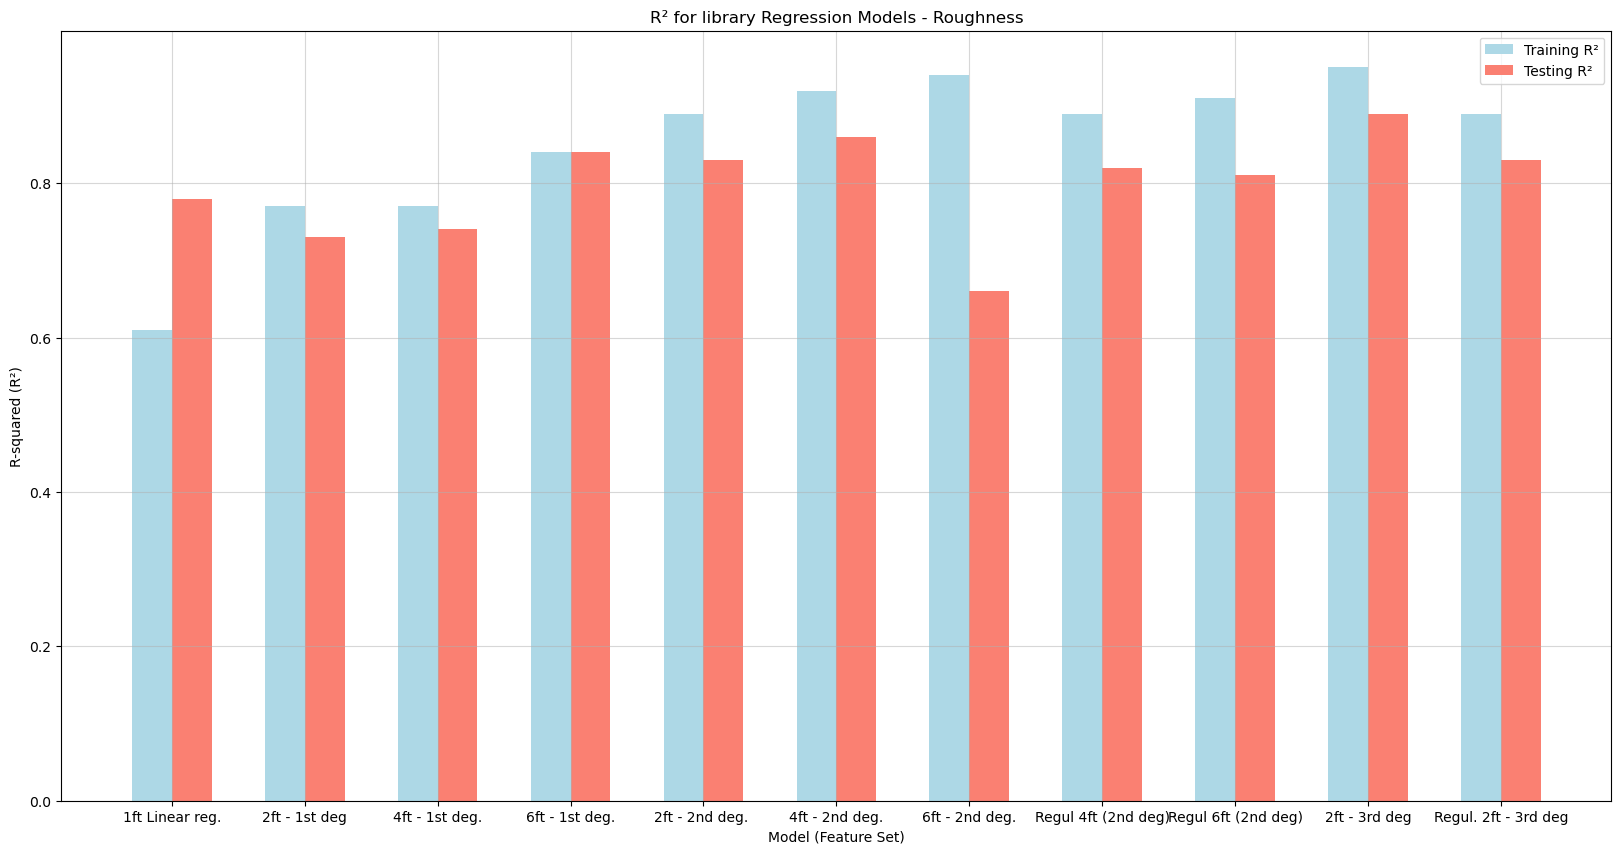

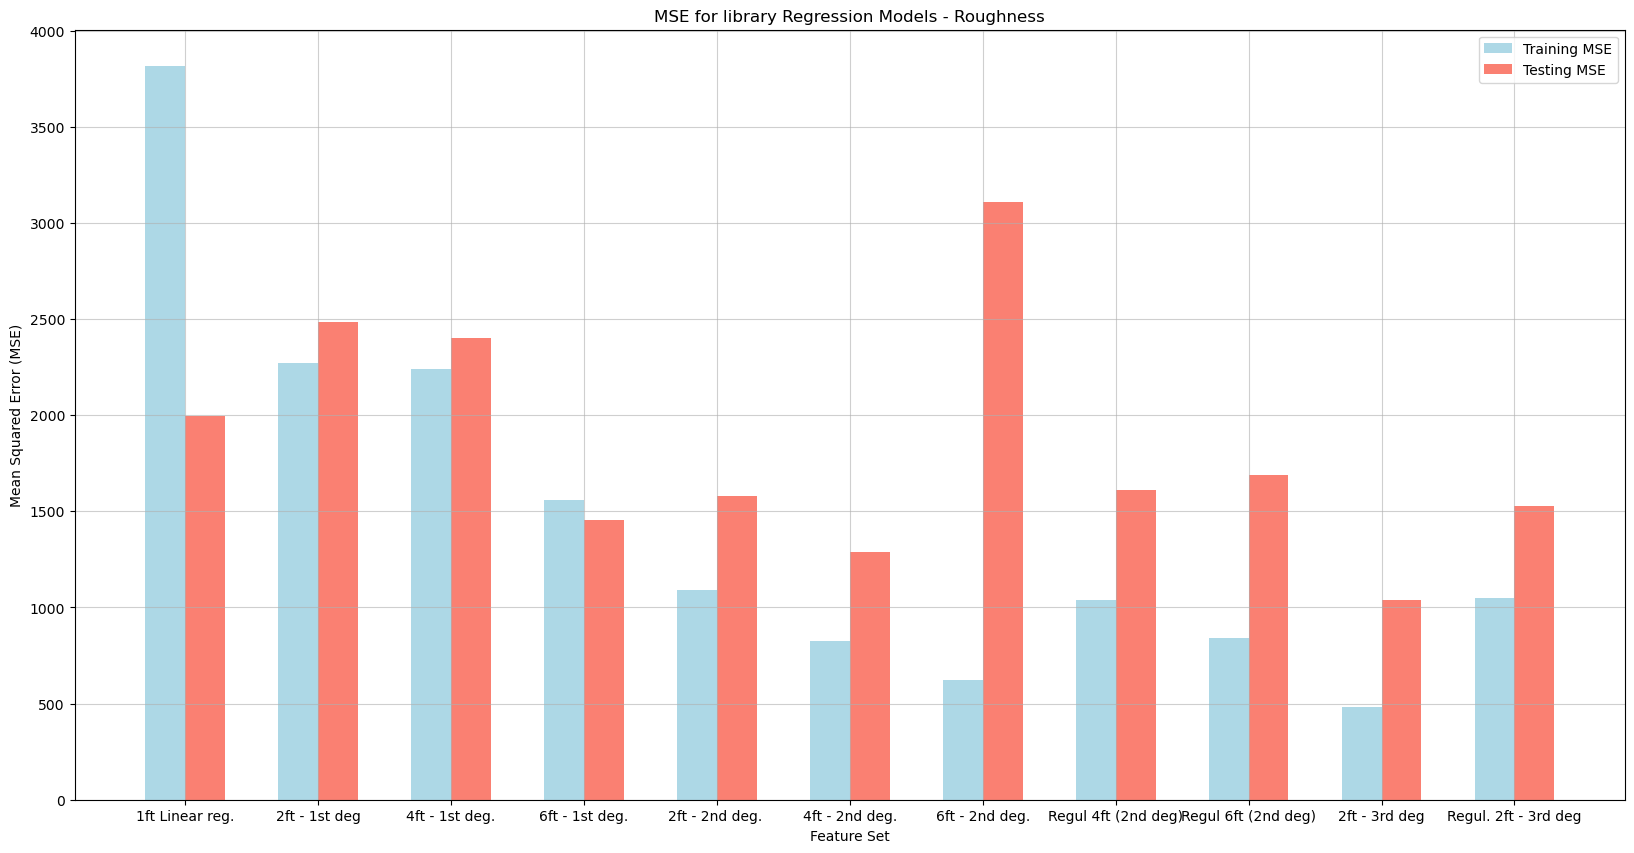

In [38]:
#Correation values for all the models for roughness implemented with the library 
r2_data = {
    "Model": ["1ft Linear reg.", "2ft - 1st deg", "4ft - 1st deg.", "6ft - 1st deg.", "2ft - 2nd deg. ", "4ft - 2nd deg.", "6ft - 2nd deg.", "Regul 4ft (2nd deg)", "Regul 6ft (2nd deg)", "2ft - 3rd deg", "Regul. 2ft - 3rd deg"],
    "Degree": [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2 ],
    "Train R2": [0.61, 0.77, 0.77, 0.84, 0.89, 0.92, 0.94, 0.89, 0.91, 0.95, 0.89],  
    "Test R2":  [0.78, 0.73, 0.74, 0.84, 0.83, 0.86, 0.66, 0.82, 0.81, 0.89, 0.83] }

r2_df = pd.DataFrame(r2_data)#Making the above inuted R^2 values as dataframes

x_labels = r2_df["Model"].values
x = np.arange(len(x_labels))
width = 0.3

plt.figure(figsize=(20, 10))
plt.bar(x - width/2, r2_df["Train R2"], width, label='Training R²', color='lightblue')
plt.bar(x + width/2, r2_df["Test R2"], width, label='Testing R²', color='salmon')

plt.xticks(x, x_labels)
plt.xlabel("Model (Feature Set)")
plt.ylabel("R-squared (R²)")
plt.title("R² for library Regression Models - Roughness")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()

#MSE values from the library implemented models for roughness
data = {
    "Model": ["1ft Linear reg.", "2ft - 1st deg", "4ft - 1st deg." , "6ft - 1st deg.", "2ft - 2nd deg. ", "4ft - 2nd deg.", "6ft - 2nd deg.",  "Regul 4ft (2nd deg)", "Regul 6ft (2nd deg)", "2ft - 3rd deg", "Regul. 2ft - 3rd deg"],
    "Degree": [2, 2, 2, 2, 2, 2, 2, 2, 2,2, 2 ],
    "Train MSE": [3814, 2270, 2238, 1558, 1093, 823, 622, 1040, 840, 484.66, 1047],
    "Test MSE": [1995, 2485, 2401, 1457, 1582, 1288, 3109, 1613, 1691, 1040, 1526]} 

mse_df = pd.DataFrame(data)

#visualising
x_labels = mse_df["Model"].values
x = np.arange(len(x_labels))
width = 0.3

plt.figure(figsize=(20, 10))
plt.bar(x - width/2, mse_df["Train MSE"], width, label='Training MSE', color='lightblue')
plt.bar(x + width/2, mse_df["Test MSE"], width, label='Testing MSE', color='salmon')

plt.xticks(x, x_labels)
plt.xlabel("Feature Set")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE for library Regression Models - Roughness")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)
plt.show()

The  bar charts repreresent the key parameters of the different implemented models for roughness using linear regression. The Blue bars are the testing sets and the salmon red is the results of the testing set of the model. 
For the best fitting model the R^2 values should be high for both training and testing sets, also low MSE for both sets and the gap between the training and testing sets should be as small as possible. 

* 1st Model Simple linear regression with 1 feature (1ft. Linear reg.) - Underfitting -
The feature that was selected was 'layer height' and was chosen because it has the strongest correlation with roughness, 0.80. 
Due to low training correlation R^2, 0.61 and higher testing set R^2, 0.78. The high MSE for training but low for testing set indicate of non consistent behaviour and is a sign of underfitting. 

* 2nd Model Linear regression with 2 features (2ft. Linear 1 deg) and 3rd model, Linear regression 4 features (4ft - 1st deg) - Reasonable - 
Both of the correlation parameters for training and testing sets are moderately strong of 0. 73 and 0.77, the difference is small so the model is somewhat balanced out, however it still underfitting a little and R^2 could be higher. 
The MSE values for both trraining and testing sets are whithin a close range, however the MSE values are both high, and not ideal for the model. 

* 4th Model Polynomial Regression 1st degree 6 features (6ft 1st deg)- Best Good Fit -
High R^2 values for both testing and training sets of 0.84, with almost no gap. The MSE values are lower for both of the sets. 

* 5th Model Polynomial Regression 2nd degree 2 features (2ft 2nd deg)  and 6th Model Polynomial Regression 2nd degree 4 features (4ft 2nd deg) - Begins to Overfit- 
The difference starts to be seen on the 5th model where the training set starts to perform better with higher R^2 values an lower the MSE for training set 

* 7th Model Polynomial Regression 2nd degree 6 features (6ft 2nd deg) - Overfitting-  
The overfitting becomes very clear as the difference in the training set and the testing sets increases. Causing an increase in MSE values and decrease in the R^2 values for the etesting set. This is likely due to overcomplication of the model. The model could benifit from regularisation.

* 8th Model Polynomial Regression 3rd degree 2 features (2ft 3rd deg) - Overfitting-
The overfitting can be seen on this odel s the MSE values differ drasticlly between the tsting nd the training sets. The r^2 correlation is also signalling that the model fit is not good, as the train R^2 is higherthan the testing correlation, indicating to the overfit. 

* 9th Model  Ridge Reguralised Polynomial Regression 3rd degree 2 features (2ft 3rd deg) - Overfitting-
The reguralsation did not hep to minimise the difference of MSE and R^2 between the training and the testing sets. Although the optimised alpha was used, it stil worsened the perfomance of the model, by decreasing the R^2 value, and increasing the MSE values, leaving the sme gap between training and testing sets. 

Based on the above analysis of the models the models "1ft Linear reg.", "4ft Linear reg.", "6ft Linear reg.",  "2ft - 2nd deg. Polynomial",  "4ft - 2nd deg." and "2ft 3rd deg" Those were selected to see the difference between the sklearn implementation and the gradiend descent method and the hyperparametrs of it. 
Model of 2nd degree and 6 parameters was implemented with regularisation. The result of regularisation made the model more consistent, however the difference in the MSE values between the training and the test sets is still large. it was also decided to do a regression for 2nd degree and 4 features, however it was seen that regulisation methods work better for the model with greater overfit. 

The model that would best suit this dataset is regression of 1st degree with 6 features of strongest correlation. 

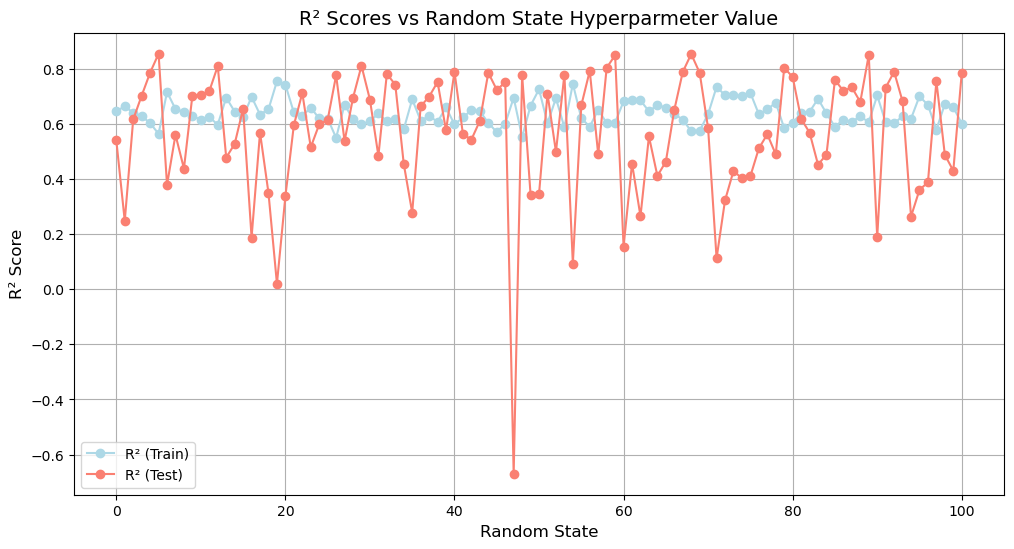

In [29]:
features = ['layer_height']
X = df[features]
y = df["roughness"]

results = []#storing results results

for seed in range(0, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    results.append({'Random State': seed,'R² (Train)': r2_train,'R² (Test)': r2_test})

#creating a DataFrame
results_df = pd.DataFrame(results)
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(results_df['Random State'], results_df['R² (Train)'], label='R² (Train)', color = 'lightblue', marker = 'o')
plt.plot(results_df['Random State'], results_df['R² (Test)'], label='R² (Test)', color = 'salmon', marker = 'o')
plt.title("R² Scores vs Random State Hyperparmeter Value", fontsize=14)
plt.xlabel("Random State", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

To select the hyperparameters the following graph was plotted to select the best random state. On the graph it is seen the correlation R^2 values for both training and testing sets.
From the plot it is seen that the Training state correlation R^2 is relatively constant and the test state varies a lot. This implies that the test set is more affected by the data split. The testing set is highly sensitive to the dataset split. This indicates the implortance of the setting of the hyperparameter random state. 
A value of 32  was selected to maximise the R^2 values for the testing set and to maintain the consistent R^2 of the trainig set. The same Hyperparameter of random state will be used for the implemented models for the fairness of the comparison. 

The below can be seen the models implemented with sklearn library, that were later visualised on the above bar plots.  The implemented models without a notebook can be seen in a separate notebook. 

Linear Regression – With Library

Training Set:
Mean Absolute Error (MAE): 47.37
Mean Squared Error (MSE): 3814.12
Root Mean Squared Error (RMSE) : 61.76
R-squared (R²): 0.61

Testing Set:
Mean Absolute Error (MAE) : 37.18
Mean Squared Error (MSE) : 1994.55
Root Mean Squared Error (RMSE): 44.66
R-squared (R²) : 0.78


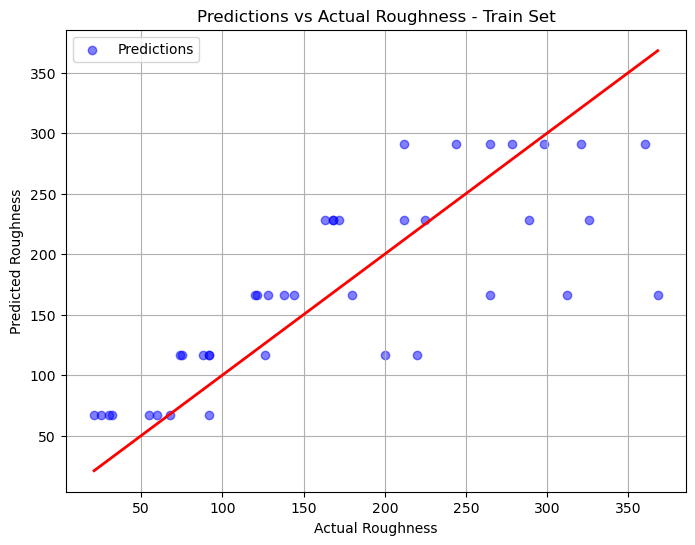

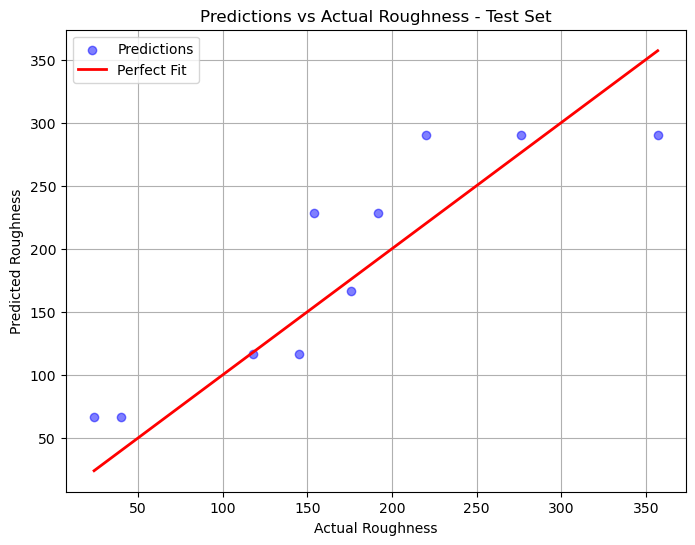

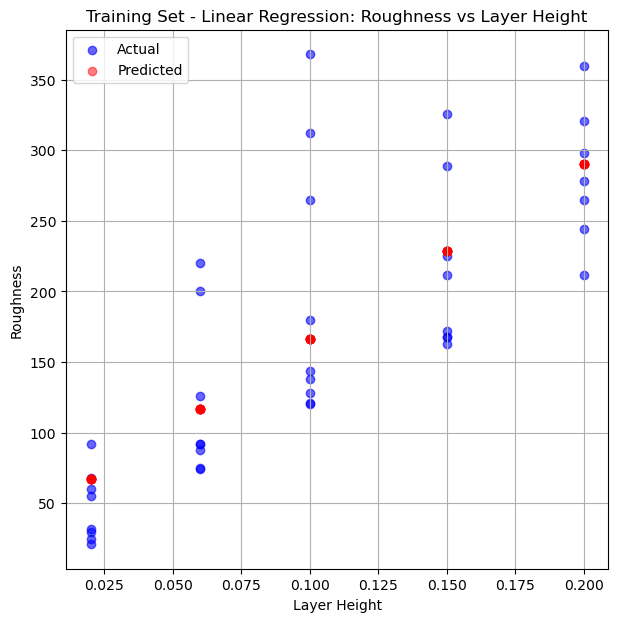

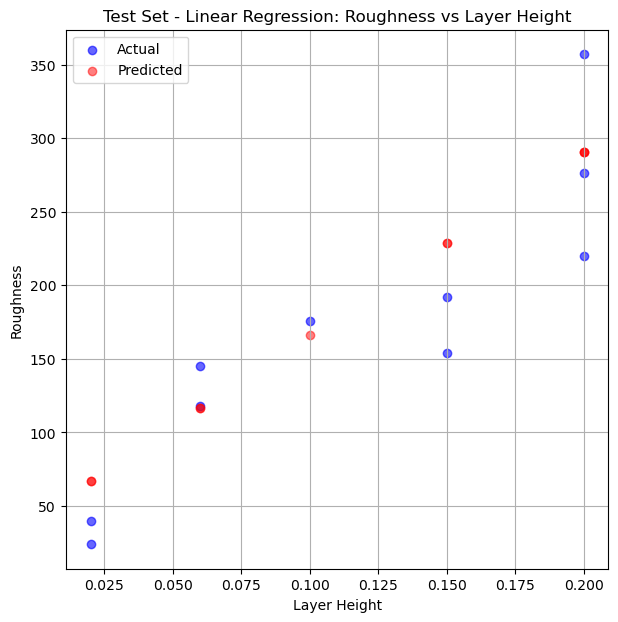

In [16]:
features = ['layer_height']#selecting only one feature
X = df[features]
y = df["roughness"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

model = LinearRegression()#trains linear regression
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test) #predicts the output

linear_reg = LinearRegression()#Training Linear Regression Model
linear_reg.fit(X_train, y_train)

slope = linear_reg.coef_[0] #First coefficient gradient(m)
intercept = linear_reg.intercept_ #y intercept(c)


#Training Set Evaluation
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Test Set Evaluation
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f"Linear Regression – With Library")
# Print the evaluation parameters 
print("\nTraining Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE) : {mae_test:.2f}")
print(f"Mean Squared Error (MSE) : {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²) : {r2_test:.2f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label="Predictions")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-', lw=2)
plt.grid(True)
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.title("Predictions vs Actual Roughness - Train Set")
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2, label="Perfect Fit")
plt.grid(True)
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.title("Predictions vs Actual Roughness - Test Set")
plt.legend()
plt.show()


plt.figure(figsize=(7, 7))  #Training Set
plt.scatter(X_train["layer_height"], y_train, color='blue', label="Actual", alpha=0.6)
plt.scatter(X_train["layer_height"], y_train_pred, color='red', label="Predicted", alpha=0.5)
plt.title("Training Set - Linear Regression: Roughness vs Layer Height")
plt.xlabel("Layer Height")
plt.ylabel("Roughness")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 7))  #Test Set
plt.scatter(X_test["layer_height"], y_test, color='blue', label="Actual", alpha=0.6)
plt.scatter(X_test["layer_height"], y_test_pred, color='red', label="Predicted", alpha=0.5)
plt.title("Test Set - Linear Regression: Roughness vs Layer Height")
plt.xlabel("Layer Height")
plt.ylabel("Roughness")
plt.legend()
plt.grid(True)
plt.show()




Polynomial Regression 2nd Degree 2 Features with library

Training Set:
Mean Absolute Error (MAE): 23.12
Mean Squared Error (MSE): 1093.45
Root Mean Squared Error (RMSE) : 33.07
R-squared (R²): 0.89

Testing Set:
Mean Absolute Error (MAE) : 31.18
Mean Squared Error (MSE) : 1581.86
Root Mean Squared Error (RMSE): 39.77
R-squared (R²) : 0.83


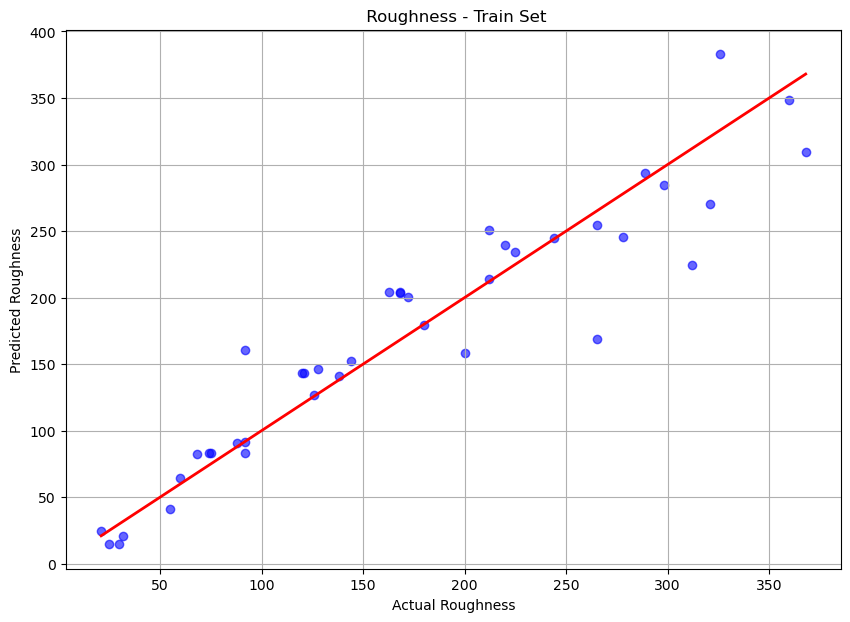

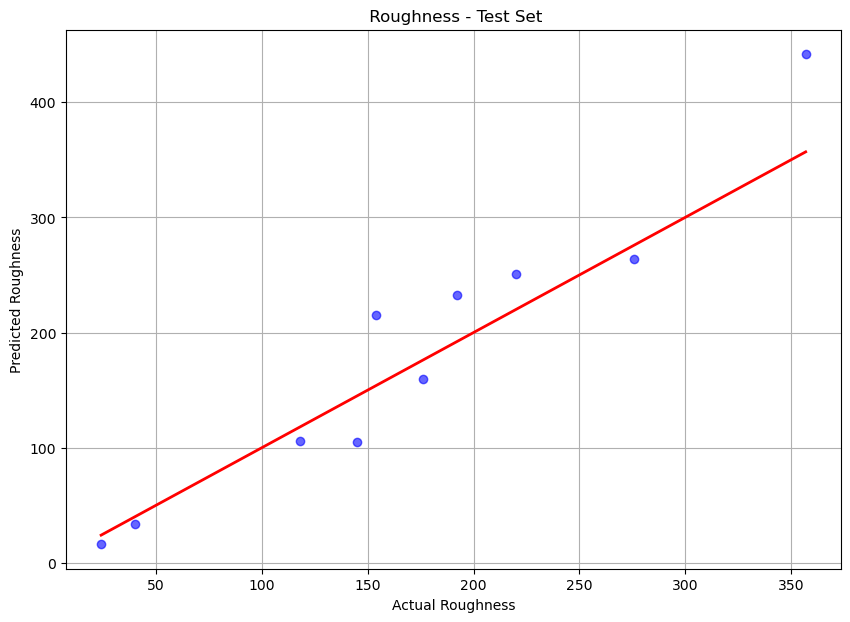

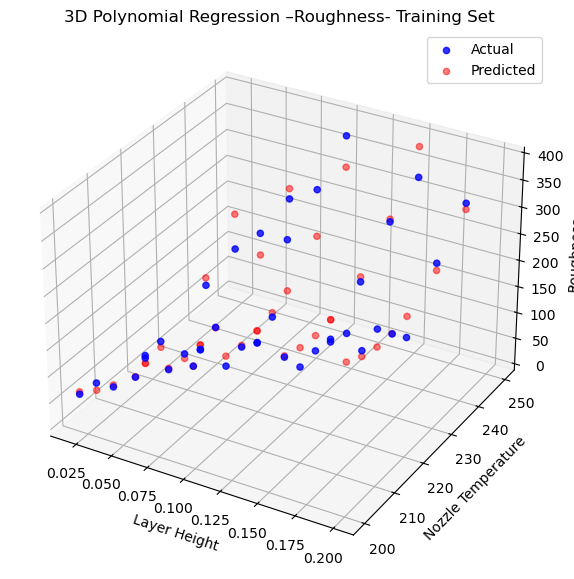

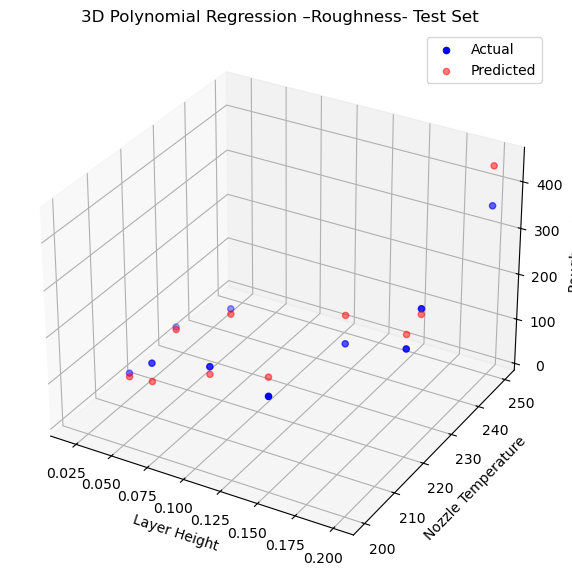

In [5]:
X = df[['layer_height', 'nozzle_temperature']] #defining the features of the model 
y = df['roughness'] #defining the label 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

poly = PolynomialFeatures(degree=2) #Creating a polynomial Linear regression, dependent on 2 features 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


model = LinearRegression()
model.fit(X_train_poly, y_train)

#Doing the model predictions 
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

print(f"Polynomial Regression 2nd Degree 2 Features with library")#Evaluation of a model 
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("\nTraining Set:")#printing the evaluations 
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE) : {mae_test:.2f}")
print(f"Mean Squared Error (MSE) : {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²) : {r2_test:.2f}")


# Plot Predictions vs Actuals
plt.figure(figsize=(10, 7))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.title(" Roughness - Train Set")
plt.grid(True)
plt.show()

# Plot Predictions vs Actuals
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.title(" Roughness - Test Set")
plt.grid(True)
plt.show()


#initialising the 3d plot for training set 
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
# Actual values in the training set
ax.scatter(X_train['layer_height'], X_train['nozzle_temperature'], y_train, color='blue', alpha=0.8, label='Actual')
# Predicted values in the training set
ax.scatter(X_train['layer_height'], X_train['nozzle_temperature'], y_train_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel('Layer Height')#labelling 
ax.set_ylabel('Nozzle Temperature')
ax.set_zlabel('Roughness')
ax.set_title("3D Polynomial Regression –Roughness- Training Set")
ax.legend()
plt.show()

#initialising the 3d plot for testing set 
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(X_test['layer_height'], X_test['nozzle_temperature'], y_test, color='blue', label='Actual')
ax.scatter(X_test['layer_height'], X_test['nozzle_temperature'], y_test_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel('Layer Height')
ax.set_ylabel('Nozzle Temperature')
ax.set_zlabel('Roughness')
ax.set_title("3D Polynomial Regression –Roughness- Test Set")
ax.legend()
plt.show()


Polynomial Regression 2nd Degree, 4 features with library

Training Set:
Mean Absolute Error (MAE): 21.48
Mean Squared Error (MSE): 822.67
Root Mean Squared Error (RMSE) : 28.68
R-squared (R²): 0.92

Testing Set:
Mean Absolute Error (MAE) : 29.96
Mean Squared Error (MSE) : 1287.84
Root Mean Squared Error (RMSE): 35.89
R-squared (R²) : 0.86


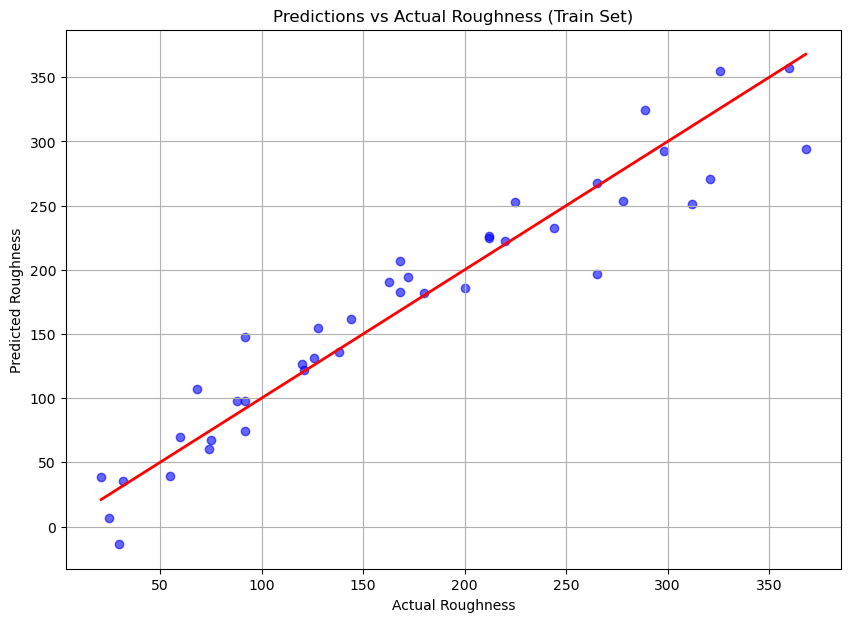

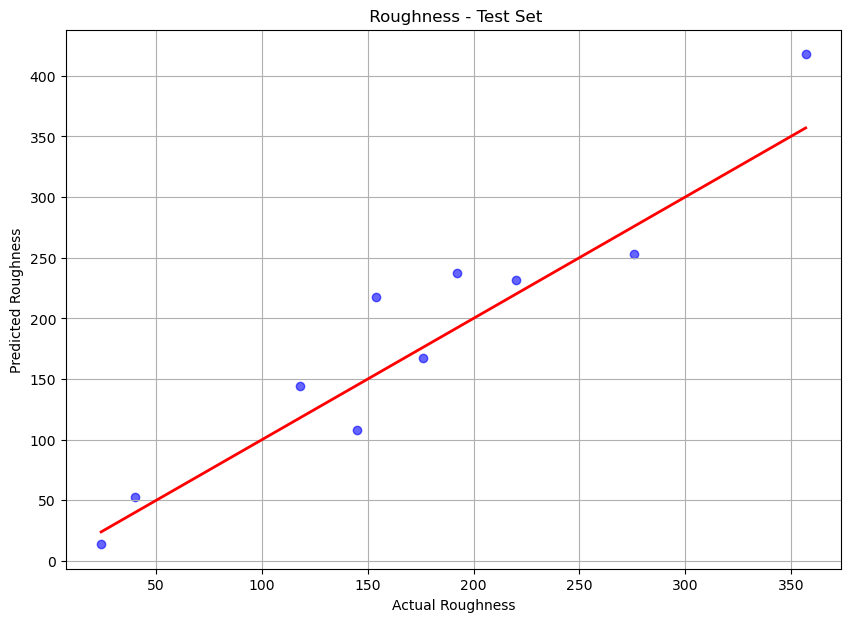

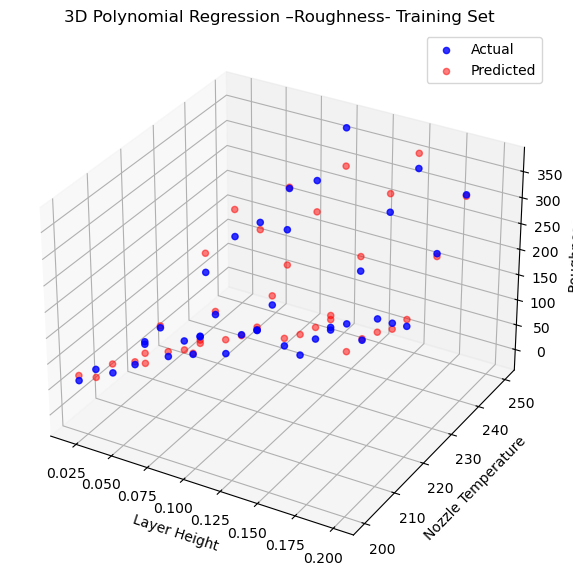

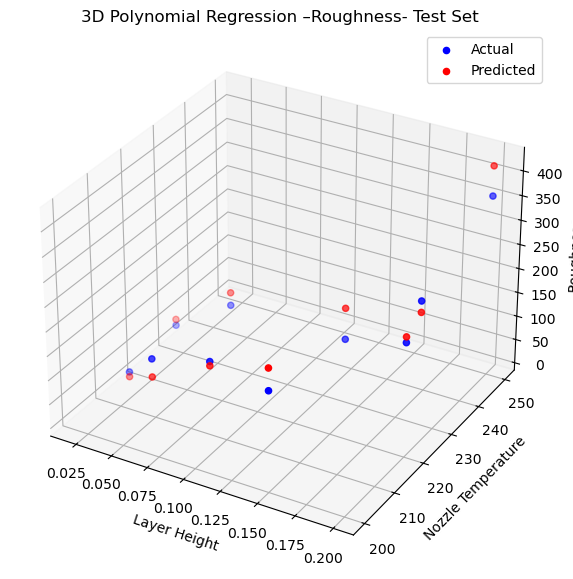

In [6]:
features = ['layer_height', 'nozzle_temperature', 'wall_thickness', 'material_encoded']
X = df[features]
y = df['roughness']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

poly = PolynomialFeatures(degree=2)#2nd degree polynomial regression 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#Train model
model = LinearRegression()
model.fit(X_train_poly, y_train)

#Predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

print("Polynomial Regression 2nd Degree, 4 features with library")#calculating the evaluating parameters 
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)


print("\nTraining Set:") #displaying the evaluation parameters 
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE) : {mae_test:.2f}")
print(f"Mean Squared Error (MSE) : {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²) : {r2_test:.2f}")

# Plot Predictions vs Actuals
plt.figure(figsize=(10, 7))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.title("Predictions vs Actual Roughness (Train Set)")
plt.grid(True)
plt.show()

# Plot Predictions vs Actuals
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.title(" Roughness - Test Set")
plt.grid(True)
plt.show()

#initialising the 3d plot for training set 
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(X_train['layer_height'], X_train['nozzle_temperature'], y_train,color='blue', label='Actual', alpha=0.8)
ax.scatter(X_train['layer_height'], X_train['nozzle_temperature'], y_train_pred, color='red', label='Predicted', alpha=0.5)
ax.set_xlabel('Layer Height')#labeling and titels 
ax.set_ylabel('Nozzle Temperature')
ax.set_zlabel('Roughness')
ax.set_title("3D Polynomial Regression –Roughness- Training Set")
ax.legend()
plt.show()


#initialising the 3d plot for testing set
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(X_test['layer_height'], X_test['nozzle_temperature'], y_test, color='blue', label='Actual')
ax.scatter(X_test['layer_height'], X_test['nozzle_temperature'], y_test_pred, color='red', label='Predicted')
ax.set_xlabel('Layer Height')
ax.set_ylabel('Nozzle Temperature')
ax.set_zlabel('Roughness')
ax.set_title("3D Polynomial Regression –Roughness- Test Set")
ax.legend()
plt.show()




Polynomial Regression 1st Degree, 6 features with library

Training Set:
Mean Absolute Error (MAE): 28.24
Mean Squared Error (MSE): 1558.93
Root Mean Squared Error (RMSE): 39.48
R-squared (R²): 0.84

Testing Set:
Mean Absolute Error (MAE): 30.85
Mean Squared Error (MSE): 1457.62
Root Mean Squared Error (RMSE): 38.18
R-squared (R²): 0.84


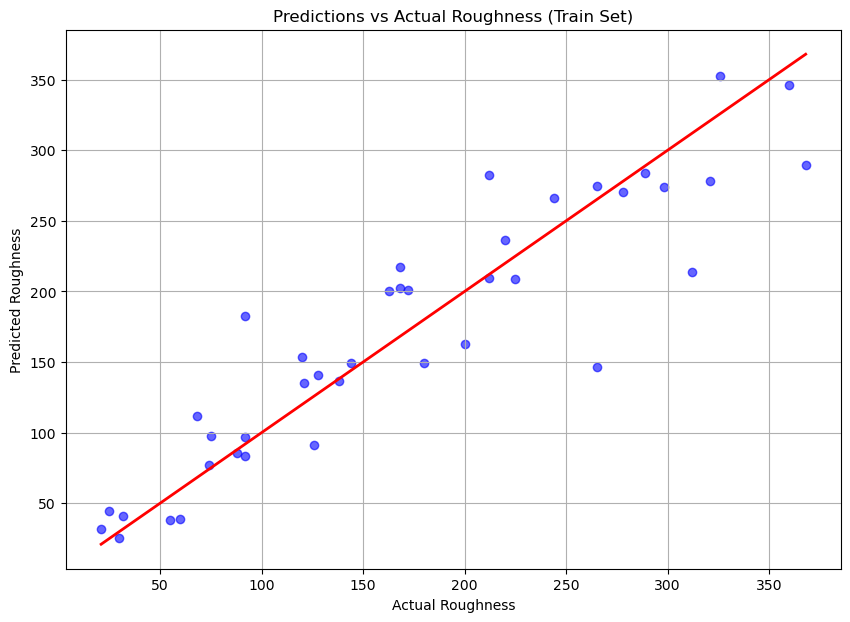

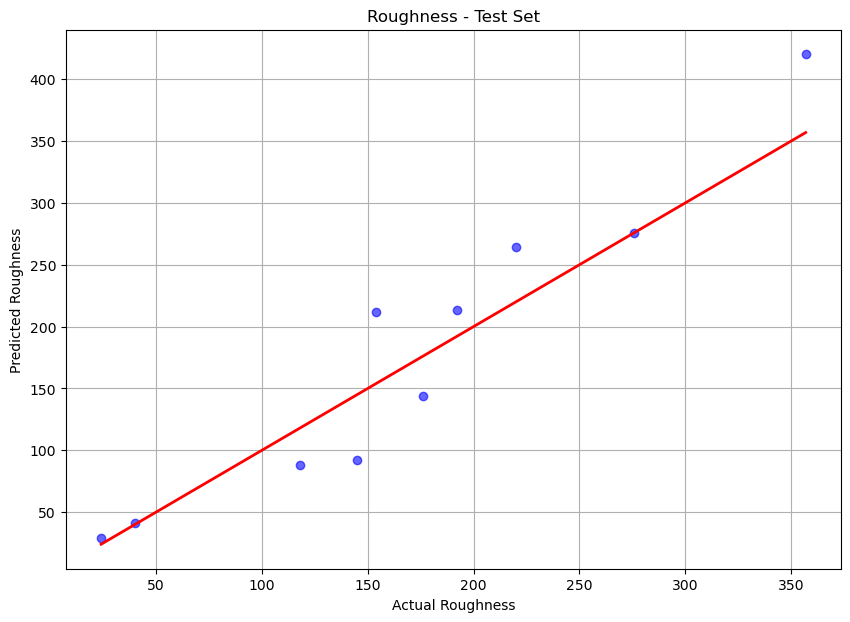

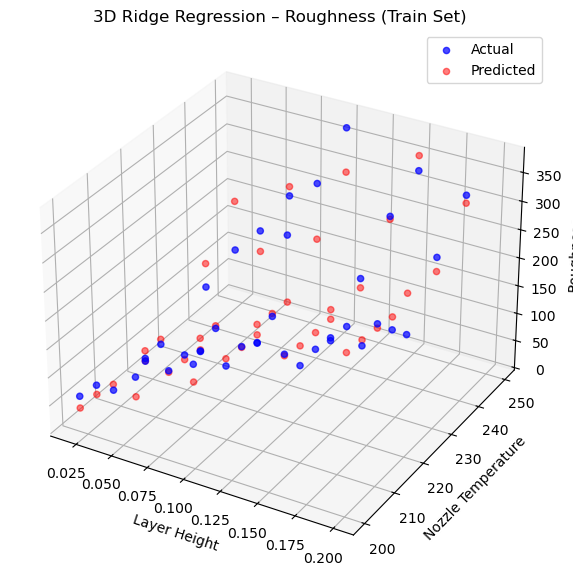

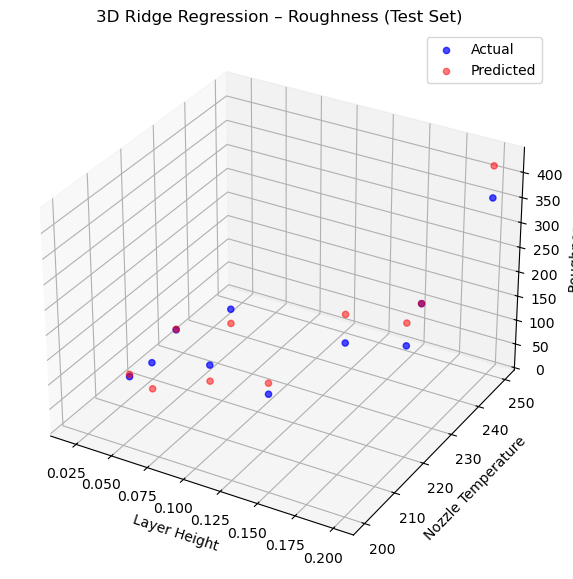

In [18]:
#Tryng the model with the 6 features that have correlation with roughness 
features = ['layer_height', 'nozzle_temperature', 'wall_thickness', 'material_encoded', 'bed_temperature', 'fan_speed']
X = df[features]
y = df['roughness']

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#Training the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

#Making the prediction
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

#Evaluation of the model 
print("Polynomial Regression 1st Degree, 6 features with library")

#training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

#testing set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

#displaying the results 
print("\nTraining Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")

#plotting training set 
plt.figure(figsize=(10, 7))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.title("Predictions vs Actual Roughness (Train Set)")
plt.grid(True)
plt.show()

#plotting testing set 
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.title("Roughness - Test Set")
plt.grid(True)
plt.show()

X_raw = df[features].values
X_raw_train, X_raw_test = train_test_split(X_raw, test_size=0.2, random_state=32)

#Extraction of original features for plotting
layer_height_train = X_raw_train[:, 0]
nozzle_temp_train = X_raw_train[:, 1]
layer_height_test = X_raw_test[:, 0]
nozzle_temp_test = X_raw_test[:, 1]

#3D Plot - Training Set
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(layer_height_train, nozzle_temp_train, y_train, color='blue', alpha=0.7, label='Actual')
ax.scatter(layer_height_train, nozzle_temp_train, y_train_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel("Layer Height")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Roughness")
ax.set_title("3D Ridge Regression – Roughness (Train Set)")
ax.legend()
plt.show()

#3D Plot - Test Set
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(layer_height_test, nozzle_temp_test, y_test, color='blue', alpha=0.7, label='Actual')
ax.scatter(layer_height_test, nozzle_temp_test, y_test_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel("Layer Height")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Roughness")
ax.set_title("3D Ridge Regression – Roughness (Test Set)")
ax.legend()
plt.show()


With regularisatuion 

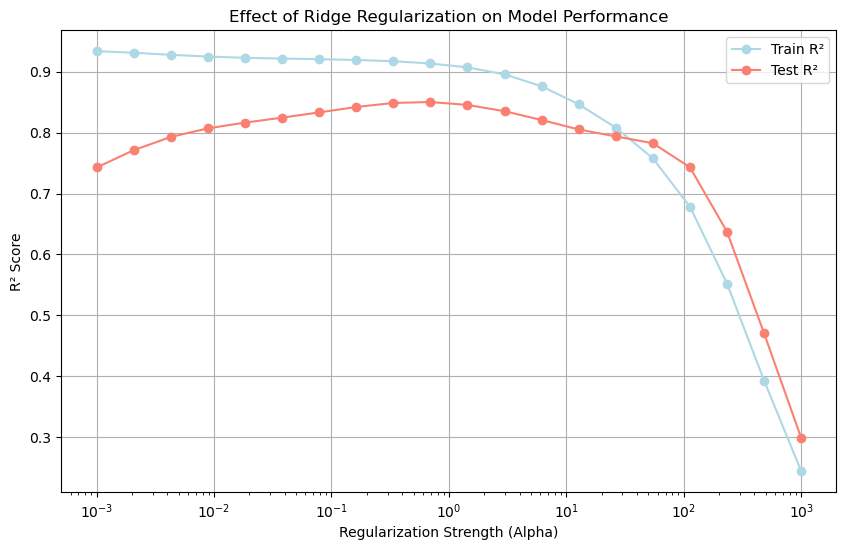

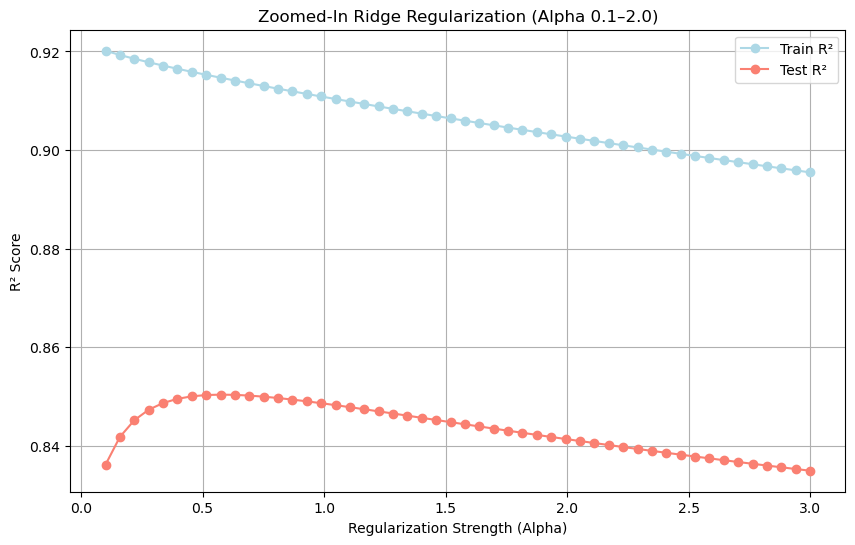

In [21]:
#Selecting features and target
features = ['layer_height', 'nozzle_temperature', 'wall_thickness', 'material_encoded', 'bed_temperature', 'fan_speed']
X = df[features]
y = df['roughness']

#regularising the 2nd degree 6ft model
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

#scailing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

alphas = np.logspace(-3, 3, 20)
r2_train_list = []
r2_test_list = []

#training the model with the different alpha paramenters 
for alpha in alphas: #helps to visualise the best hyperparameter
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    r2_train_list.append(r2_score(y_train, model.predict(X_train)))
    r2_test_list.append(r2_score(y_test, model.predict(X_test)))

# plotting
plt.figure(figsize=(10, 6))
plt.plot(alphas, r2_train_list, label='Train R²', marker='o', color='lightblue')
plt.plot(alphas, r2_test_list, label='Test R²', marker='o', color='salmon')
plt.xscale('log')
plt.xlabel("Regularization Strength (Alpha)")
plt.ylabel("R² Score")
plt.title("Effect of Ridge Regularization on Model Performance")
plt.grid(True)
plt.legend()
plt.show()

#defining the zoomed in values of alpha 
zoomed_alphas = np.linspace(0.1, 3.0, 50)#setting the range and the number of values
zoomed_r2_train = []
zoomed_r2_test = []

#training  and evaluate Ridge regression for each alpha
for alpha in zoomed_alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    zoomed_r2_train.append(r2_score(y_train, y_train_pred))
    zoomed_r2_test.append(r2_score(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(zoomed_alphas, zoomed_r2_train, label='Train R²', marker='o', color='lightblue')
plt.plot(zoomed_alphas, zoomed_r2_test, label='Test R²', marker='o',  color='salmon')
plt.xlabel("Regularization Strength (Alpha)")
plt.ylabel("R² Score")
plt.title("Zoomed-In Ridge Regularization (Alpha 0.1–2.0)")
plt.grid(True)
plt.legend()
plt.show()

The above plots show the plots with different regulisation hyperparameter alpha. The hyperparameter was selected as 2 as it maximises the test set value, and brings the R^2 values of the R^2 of both sets closer, with lower MSE difference.

Polynomial Regression 2nd Degree, 6 features with library Regularised

Training Set:
Mean Absolute Error (MAE): 21.00
Mean Squared Error (MSE): 849.92
Root Mean Squared Error (RMSE): 29.15
R-squared (R²): 0.91

Testing Set:
Mean Absolute Error (MAE): 34.93
Mean Squared Error (MSE): 1674.15
Root Mean Squared Error (RMSE): 40.92
R-squared (R²): 0.82


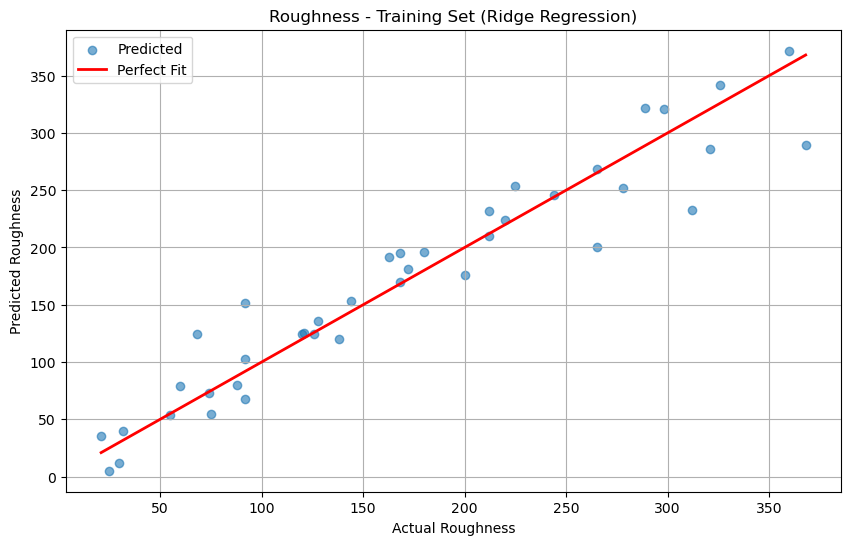

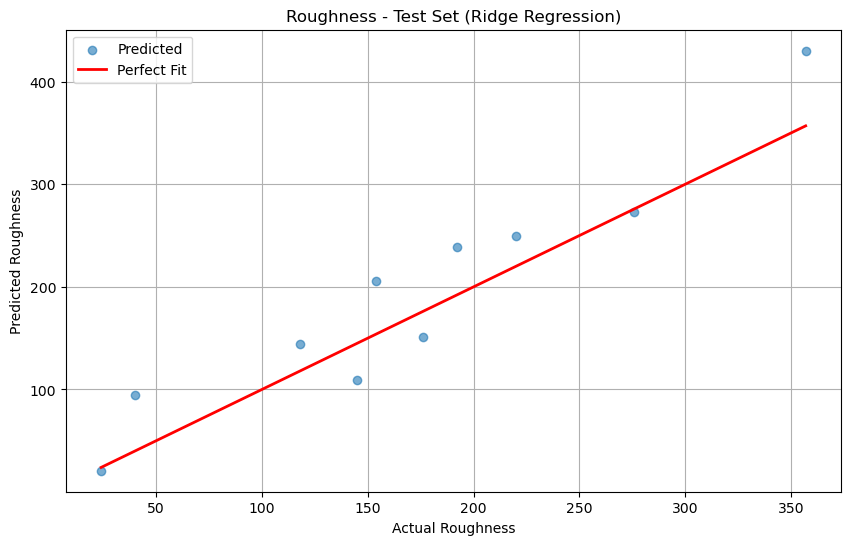

In [9]:

from sklearn.linear_model import Ridge
features = ['layer_height', 'nozzle_temperature', 'wall_thickness', 'material_encoded', 'bed_temperature', 'fan_speed']
X = df[features]
y = df['roughness']


poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=32)

# Ridge Regression
ridge_model = Ridge(alpha=3)  
ridge_model.fit(X_train, y_train)

#predictions
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

#Evaluation of the model 
print("Polynomial Regression 2nd Degree, 6 features with library Regularised")

#training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

#testing set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

#displaying the results 
print("\nTraining Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")


#2D Plot - Training Set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6, label="Predicted")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-', lw=2, label="Perfect Fit")
plt.title("Roughness - Training Set (Ridge Regression)")
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.grid(True)
plt.legend()
plt.show()

#2D Plot - Test Set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2, label="Perfect Fit")
plt.title("Roughness - Test Set (Ridge Regression)")
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.grid(True)
plt.legend()
plt.show()




Polynomial Regression 2nd Degree, 6 features with library Regularised

Training Set:
Mean Absolute Error (MAE): 21.00
Mean Squared Error (MSE): 849.92
Root Mean Squared Error (RMSE): 29.15
R-squared (R²): 0.91

Testing Set:
Mean Absolute Error (MAE): 34.93
Mean Squared Error (MSE): 1674.15
Root Mean Squared Error (RMSE): 40.92
R-squared (R²): 0.82


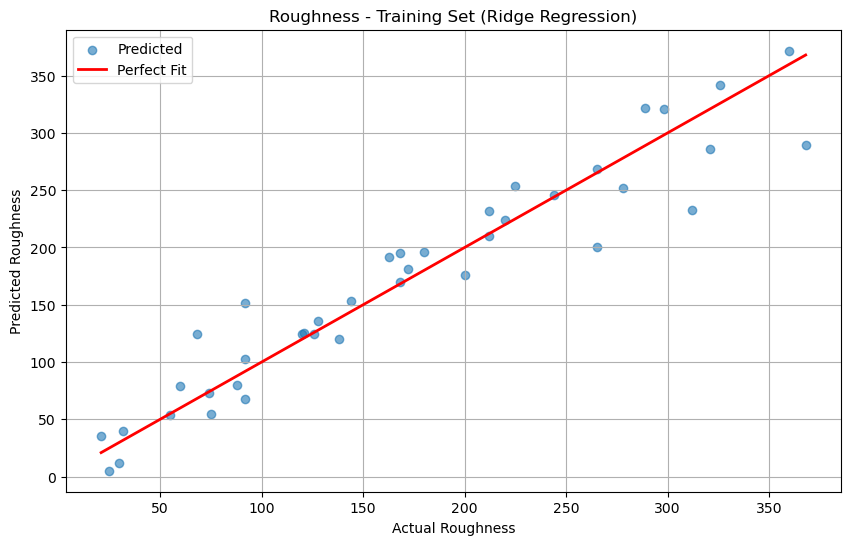

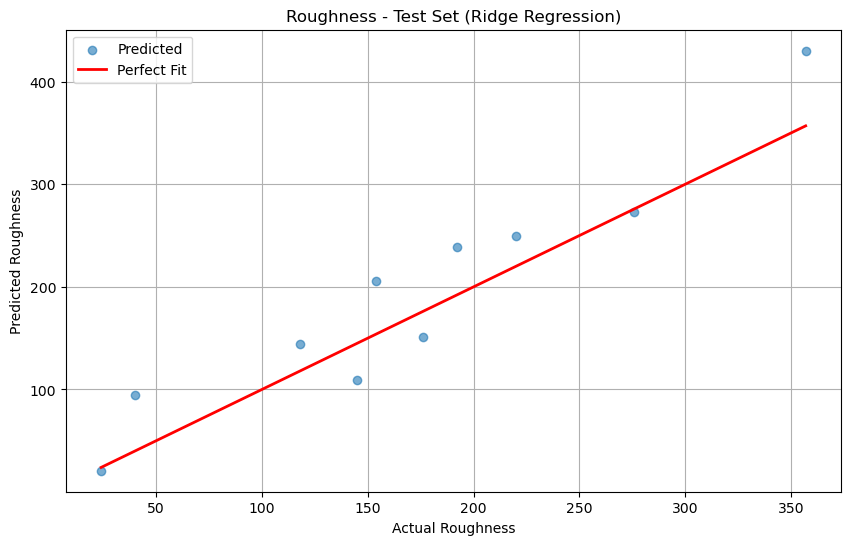

In [9]:

from sklearn.linear_model import Ridge
features = ['layer_height', 'nozzle_temperature', 'wall_thickness', 'material_encoded', 'bed_temperature', 'fan_speed']
X = df[features]
y = df['roughness']


poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=32)

# Ridge Regression
ridge_model = Ridge(alpha=3)  
ridge_model.fit(X_train, y_train)

#predictions
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

#Evaluation of the model 
print("Polynomial Regression 2nd Degree, 6 features with library Regularised")

#training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

#testing set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

#displaying the results 
print("\nTraining Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")


#2D Plot - Training Set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6, label="Predicted")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-', lw=2, label="Perfect Fit")
plt.title("Roughness - Training Set (Ridge Regression)")
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.grid(True)
plt.legend()
plt.show()

#2D Plot - Test Set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2, label="Perfect Fit")
plt.title("Roughness - Test Set (Ridge Regression)")
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.grid(True)
plt.legend()
plt.show()




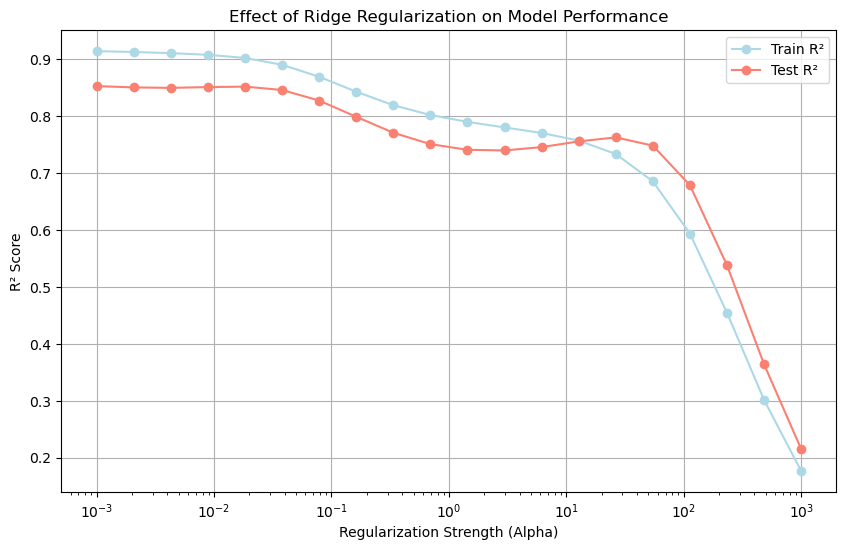

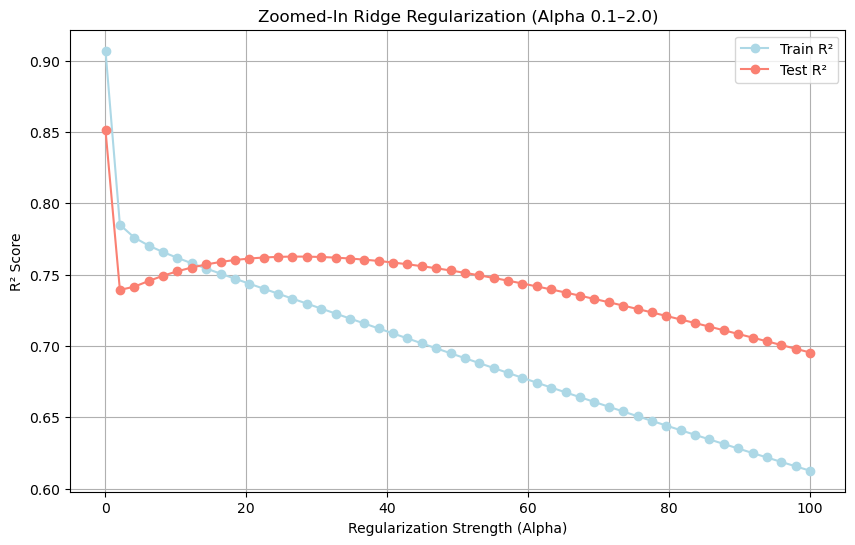

In [24]:
#Select features and target
features = ['layer_height', 'nozzle_temperature', 'wall_thickness', 'material_encoded']
X = df[features]
y = df['roughness']

#regularising the 2nd degree 6ft model
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

#scailing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

alphas = np.logspace(-3, 3, 20)
r2_train_list = []
r2_test_list = []

#training the model with the different alpha paramenters 
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    r2_train_list.append(r2_score(y_train, model.predict(X_train)))
    r2_test_list.append(r2_score(y_test, model.predict(X_test)))

# plotting
plt.figure(figsize=(10, 6))
plt.plot(alphas, r2_train_list, label='Train R²', marker='o', color='lightblue')
plt.plot(alphas, r2_test_list, label='Test R²', marker='o', color='salmon')
plt.xscale('log')
plt.xlabel("Regularization Strength (Alpha)")
plt.ylabel("R² Score")
plt.title("Effect of Ridge Regularization on Model Performance")
plt.grid(True)
plt.legend()
plt.show()

#defining the zoomed in values of alpha 
zoomed_alphas = np.linspace(0.01, 100, 50)#setting the range and the number of values
zoomed_r2_train = []
zoomed_r2_test = []

#training  and evaluate Ridge regression for each alpha
for alpha in zoomed_alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    zoomed_r2_train.append(r2_score(y_train, y_train_pred))
    zoomed_r2_test.append(r2_score(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(zoomed_alphas, zoomed_r2_train, label='Train R²', marker='o', color='lightblue')
plt.plot(zoomed_alphas, zoomed_r2_test, label='Test R²', marker='o',  color='salmon')
plt.xlabel("Regularization Strength (Alpha)")
plt.ylabel("R² Score")
plt.title("Zoomed-In Ridge Regularization (Alpha 0.1–2.0)")
plt.grid(True)
plt.legend()
plt.show()

From the plots above it is clear that this model would not benifit greatly from regression, as the R^2 scores for both training and testing sets are the same only at alpha = 10^1 and those scores are in the range of 0.75, bringing down the correlation and predicitivity consistency of the model. Hence, it is not the best model for this data. 

Polynomial Ridge Regression (2nd Degree, 4 Features)

Training Set:
Mean Absolute Error (MAE): 22.33
Mean Squared Error (MSE): 1040.01
Root Mean Squared Error (RMSE): 32.25
R-squared (R²): 0.89

Testing Set:
Mean Absolute Error (MAE): 33.64
Mean Squared Error (MSE): 1613.72
Root Mean Squared Error (RMSE): 40.17
R-squared (R²): 0.82


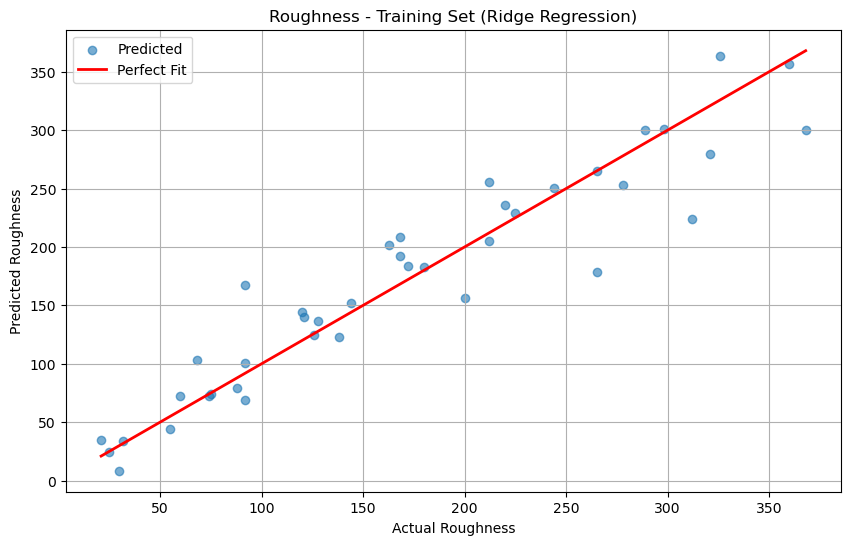

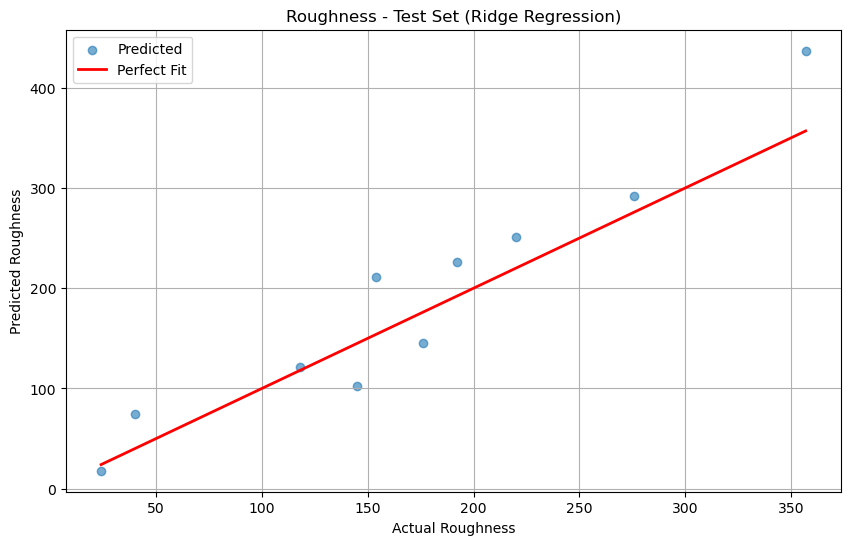

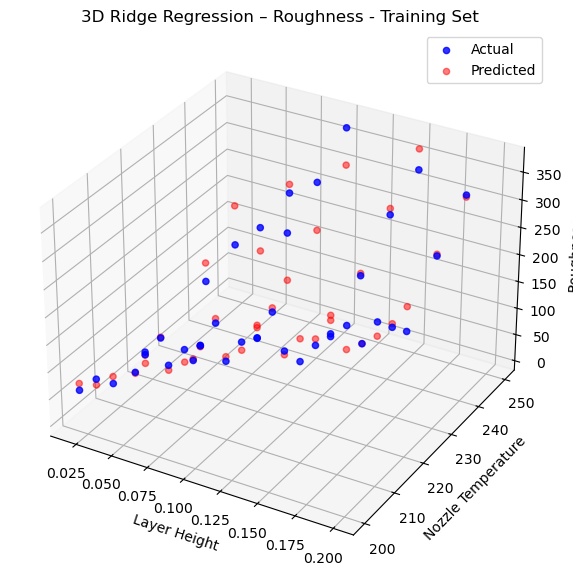

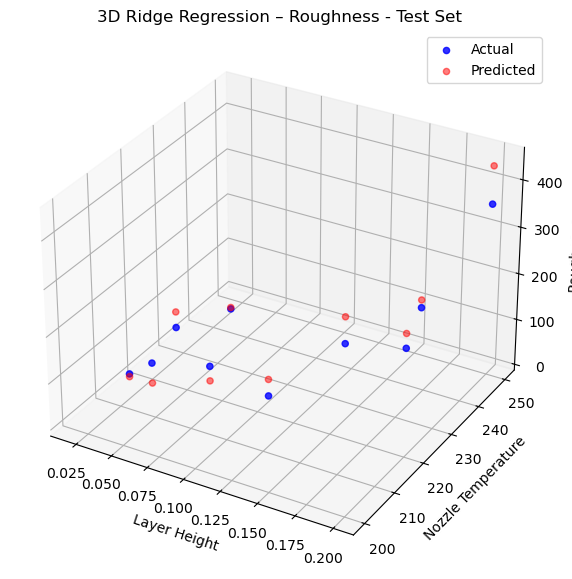

In [20]:

features = ['layer_height', 'nozzle_temperature', 'wall_thickness', 'material_encoded']
X = df[features]
y = df['roughness']

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

#polynomial features (2nd degree)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#ridge Regression (L2 Regularisation)
model = Ridge(alpha=0.01) 
model.fit(X_train_poly, y_train)

#predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

print("Polynomial Ridge Regression (2nd Degree, 4 Features)")
#training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

#testing set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

#displaying the results 
print("\nTraining Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")


#2D Plot - Training Set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6, label="Predicted")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-', lw=2, label="Perfect Fit")
plt.title("Roughness - Training Set (Ridge Regression)")
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.grid(True)
plt.legend()
plt.show()

#2D Plot - Test Set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2, label="Perfect Fit")
plt.title("Roughness - Test Set (Ridge Regression)")
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.grid(True)
plt.legend()
plt.show()

#3D Plot – Train
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(X_train['layer_height'], X_train['nozzle_temperature'], y_train, color='blue', label='Actual', alpha=0.8)
ax.scatter(X_train['layer_height'], X_train['nozzle_temperature'], y_train_pred, color='red', label='Predicted', alpha=0.5)
ax.set_xlabel('Layer Height')
ax.set_ylabel('Nozzle Temperature')
ax.set_zlabel('Roughness')
ax.set_title("3D Ridge Regression – Roughness - Training Set")
ax.legend()
plt.show()

#3D Plot – Test
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(X_test['layer_height'], X_test['nozzle_temperature'], y_test, color='blue', label='Actual', alpha=0.8)
ax.scatter(X_test['layer_height'], X_test['nozzle_temperature'], y_test_pred, color='red', label='Predicted', alpha=0.5)
ax.set_xlabel('Layer Height')
ax.set_ylabel('Nozzle Temperature')
ax.set_zlabel('Roughness')
ax.set_title("3D Ridge Regression – Roughness - Test Set")
ax.legend()
plt.show()


Polynomial Ridge Regression (3d Degree, 2 Features)

Training Set:
Mean Absolute Error (MAE): 18.21
Mean Squared Error (MSE): 484.66
Root Mean Squared Error (RMSE): 22.02
R-squared (R²): 0.95

Testing Set:
Mean Absolute Error (MAE): 29.28
Mean Squared Error (MSE): 1040.62
Root Mean Squared Error (RMSE): 32.26
R-squared (R²): 0.89


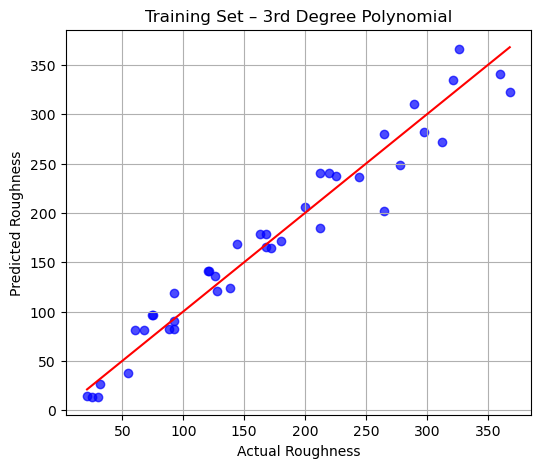

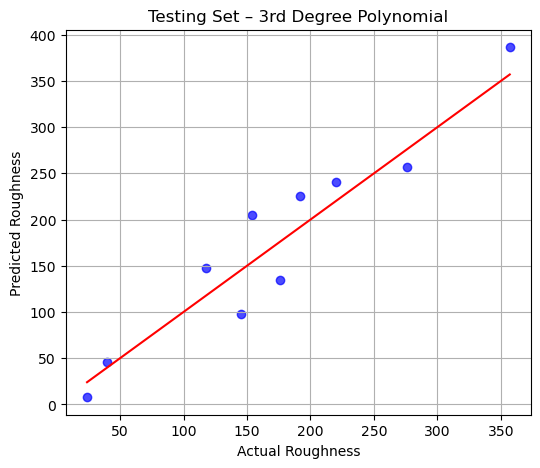

In [28]:

#selecting features
features = ['layer_height', 'nozzle_temperature']
X = df[features]
y = df['roughness']

#Generating 3rd-degree polynomial
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

#Splitting into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=32)

#fitting the linear regresion not ridge 
model = LinearRegression()
model.fit(X_train, y_train)

#predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#evaluations
#Training set
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

#Testing set
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("Polynomial Ridge Regression (3d Degree, 2 Features)")
#displaying the results 
print("\nTraining Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")

#Plots
plt.figure(figsize=(6, 5))
plt.scatter(y_train, y_train_pred, alpha=0.7, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-')
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.title("Training Set – 3rd Degree Polynomial")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.title("Testing Set – 3rd Degree Polynomial")
plt.grid(True)
plt.show()


Ridge-regularized 3rd-Degree Polynomial Regression (2 Features)

Training Set:
Mean Absolute Error (MAE): 23.04
Mean Squared Error (MSE): 1047.52
Root Mean Squared Error (RMSE): 32.37
R-squared (R²): 0.89

Testing Set:
Mean Absolute Error (MAE): 30.80
Mean Squared Error (MSE): 1526.01
Root Mean Squared Error (RMSE): 39.06
R-squared (R²): 0.83


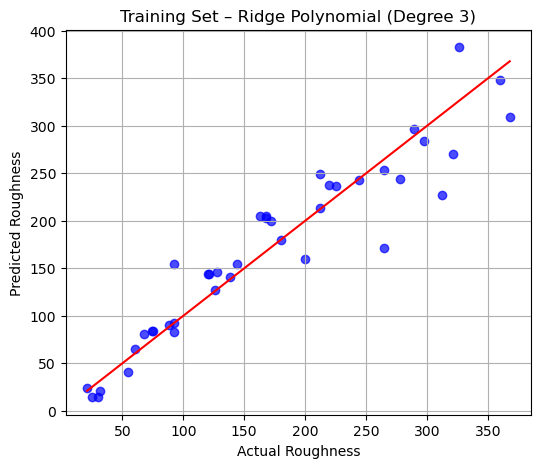

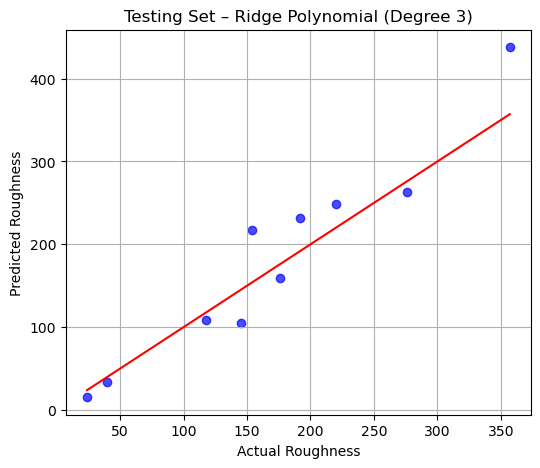

In [34]:

X = df[['layer_height', 'nozzle_temperature']]
y = df['roughness']

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

#Splittin data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=32)

#Trainig Ridge Regression
ridge_model = Ridge(alpha=0.1)#alpha of 0.1 showed miniised difference between MSE and R^2 
ridge_model.fit(X_train, y_train)

#Predictions
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

#Evaluation
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

#Printing results
print("Ridge-regularized 3rd-Degree Polynomial Regression (2 Features)")
#displaying the results 
print("\nTraining Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")


#Scatter Plot - Training Set
plt.figure(figsize=(6, 5))
plt.scatter(y_train, y_train_pred, alpha=0.7, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-')
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.title("Training Set – Ridge Polynomial (Degree 3)")
plt.grid(True)
plt.show()

#Scatter Plot - Testing Set
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')
plt.xlabel("Actual Roughness")
plt.ylabel("Predicted Roughness")
plt.title("Testing Set – Ridge Polynomial (Degree 3)")
plt.grid(True)
plt.show()
